# 출생아 수 및 합계 출산율 분석

## 데이터 정보
    합계출산율 정의 : 여성 인당 가임기간(15~49세)에 낳을 것으로 기대되는 평균 출생아 수
    연령별 출산율(ASFR) : 1년 간 발생한 모의 연령별(15~49세) 출생아 수를 해당 연령별 
                          여자의 연앙인구(7월 1일 기준)로 나누어 1,000분율로 표시
    합계 출산율 (TFR) : 여성 1명이 평생동안 낳을 것으로 예상되는 평균 출생아 수를 
                        나타낸 지표로서 연령별 출산율(ASFR)의 총합이며, 출산력 수준을 나타내는 대표적 지표임
    기간 : 2012 ~ 2020 비교
    출처 : https://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1428

In [1]:
#1. 파일 불러오기
#2. 불필요한 열 건너뛰기 : 2열 제거
#3. 인덱스 설정 : 첫번째 열
#4. 해당 데이터 선택 : 불필요한 열 제거 후 첫번째는 구분으로 자동분류되고 이후 필요한 행의 개수
import pandas as pd
df = pd.read_excel('stat_142801.xls', skiprows=2, nrows=2, index_col=0)
df

,2012,2013,2014,2015,2016,2017,2018,2019,2020
출생아 수,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.30
합계 출산율,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.84


In [2]:
#오류 : df['출생아 수']
df.index

Index(['출생아 수', '합계 출산율'], dtype='object')

In [3]:
df.index.values
#array(['출생아\xa0수', '합계\xa0출산율'], dtype=object) : 알 수 없는 값

array(['출생아\xa0수', '합계\xa0출산율'], dtype=object)

In [4]:
#index 명 변경
df.rename(index={'출생아\xa0수':'출생아 수','합계\xa0출산율':'합계 출산율'}, inplace=True)
#오류 : df['출생아 수'] - inplace 필요
df

,2012,2013,2014,2015,2016,2017,2018,2019,2020
출생아 수,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.30
합계 출산율,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.84


In [5]:
df.index.values

array(['출생아 수', '합계 출산율'], dtype=object)

In [6]:
#출생아 수 데이터 가져오기 - 방법 1
df.loc['출생아 수']

2012    484.6
2013    436.5
2014    435.4
2015    438.4
2016    406.2
2017    357.8
2018    326.8
2019    302.7
2020    272.3
Name: 출생아 수, dtype: float64

In [7]:
#출생아 수 데이터 가져오기 - 방법 2
df.iloc[0]

2012    484.6
2013    436.5
2014    435.4
2015    438.4
2016    406.2
2017    357.8
2018    326.8
2019    302.7
2020    272.3
Name: 출생아 수, dtype: float64

In [8]:
#합계 출산율 데이터 가져오기 - 방법 1
df.loc['합계 출산율']

2012    1.297
2013    1.187
2014    1.205
2015    1.239
2016    1.172
2017    1.052
2018    0.977
2019    0.918
2020    0.840
Name: 합계 출산율, dtype: float64

In [9]:
#합계 출산율 데이터 가져오기 - 방법 2
df.iloc[1]

2012    1.297
2013    1.187
2014    1.205
2015    1.239
2016    1.172
2017    1.052
2018    0.977
2019    0.918
2020    0.840
Name: 합계 출산율, dtype: float64

In [10]:
#행과 열의 위치를 바꾸기 - 동기화
df = df.T
df

,출생아 수,합계 출산율
2012,484.6,1.297
2013,436.5,1.187
2014,435.4,1.205
2015,438.4,1.239
2016,406.2,1.172
2017,357.8,1.052
2018,326.8,0.977
2019,302.7,0.918
2020,272.3,0.840


## 데이터 시각화

In [11]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Malgun Gothic' #Window
#matplotlib.rcParams['font.family'] = 'AppleGothic' #Mac
matplotlib.rcParams['font.size'] = 15 #글자크기 
#한글 폰트 사용시, 마이너스 표시 깨짐 설정
matplotlib.rcParams['axes.unicode_minus'] = False

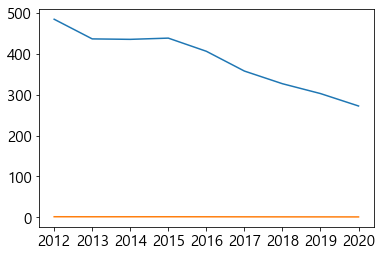

In [12]:
#꺾은선 그래프 그리기
plt.plot(df.index, df['출생아 수'])
plt.plot(df.index, df['합계 출산율'])
#오류 : 다른 값을 가지고 있기 때문에 - 

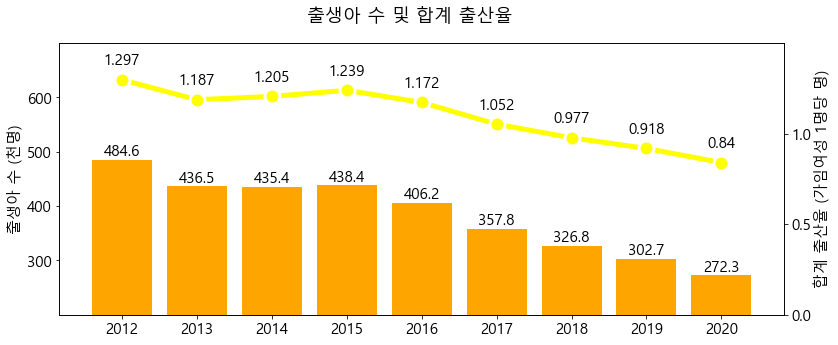

In [14]:
#x축(연도)을 공유하는 y축 2개(좌-출생아 수, 우-합계 출산율) 생성

#출생아 수 - 막대 그래프
fig, ax1 = plt.subplots(figsize=(13,5)) #default값 1, 1 - 1개의 그래프
fig.suptitle('출생아 수 및 합계 출산율')

ax1.set_ylabel('출생아 수 (천명)')
ax1.set_ylim(200, 700)
ax1.set_yticks([300, 400, 500, 600])
ax1.bar(df.index, df['출생아 수'], color='orange')
#데이터 표시 - 방법 1
#for idx, val in enumerate(df['출생아 수']):
#    ax1.text(idx, val + 12, val, ha='center')

#데이터 표시 - 방법 2
bar = ax1.bar(df.index, df['출생아 수'], color='orange') 
for idx, rect in enumerate(bar):
    #print(rect)
    plt.text(idx, rect.get_height()+7, df['출생아 수'][idx], ha='center')

#합계 출산율 - 꺾은선 그래프
#x축 공유하는 쌍둥이 축
ax2 = ax1.twinx()
ax2.set_ylabel('합계 출산율 (가임여성 1명당 명)')
ax2.set_ylim(0, 1.5)
ax2.set_yticks([0, 0.5, 1])
line = ax2.plot(df.index, df['합계 출산율'], color='yellow', marker='o', ms=15, mec='w', 
                mew=3, lw=5)
for idx, val in enumerate(df['합계 출산율']):
    ax2.text(idx, val+0.08, val, ha='center')
#오류 : for idx, rect in enumerate(line)
        #ax2.text(idx, rect.get_height(), values[idx])
        #bar만 가능
        
plt.savefig('출생아 수 및 합계 출산율 비교.png', dpi=100)